In [ ]:
#Importar las librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
#Importar los datos necesarios

datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")
datos.head()

In [7]:
#Toma variables X excluyendo actividad riesgo

X = datos.iloc[:,1:33]

#Toma variable Y

Y = datos.iloc[:,0:1]

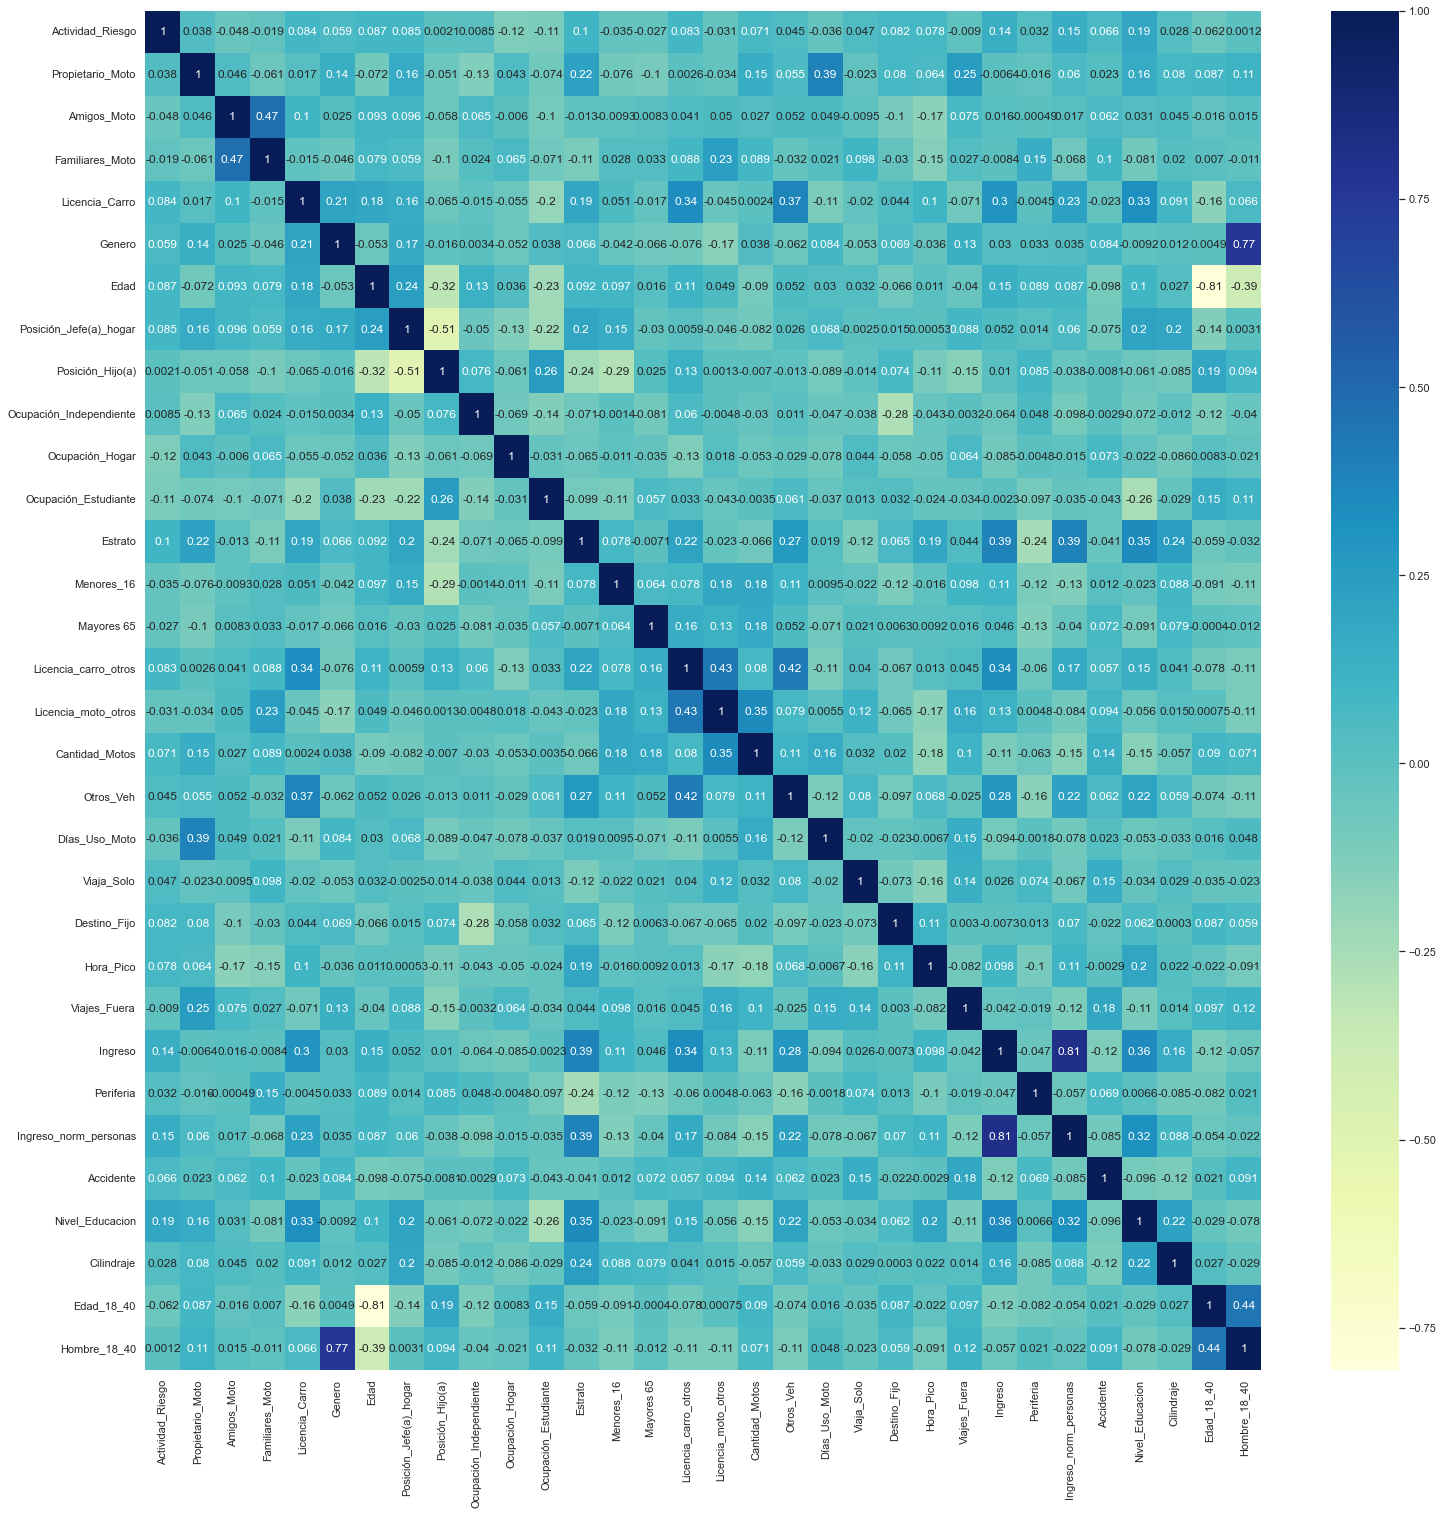

In [8]:
#Calcula la matriz de correlación 

Correl = datos.corr() #Matriz correlación método dataframe
Correl1 = np.corrcoef(datos.values.T) #Método numpy

#Mapa de color para identificar correlaciones

sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(Correl,annot=True, cmap='YlGnBu')
plt.savefig("Matriz_Correlación_Y2.jpg")

In [6]:
#Análisis de multicolinealidad utilizando el factor de inflación de la varianza
#Siempre que sea mayor a 5 significa colinealidad alta

VIF_ = []
Columnas = list(X.columns)

Correlacionadas = []

for i in range(len(Columnas)-1): 
    
    X = datos.iloc[:,1:33]
    
    Y_=datos.iloc[:,1+i:2+i]
    
    X.pop(Columnas[i])
    
    x_train = X.values
    y_train = Y_.values
       
    model = LinearRegression()
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_train)
    
    VIF = 1/(1-metrics.r2_score(y_train, y_pred))
    
    VIF_.append(VIF)
    
    if VIF>8: 
        
        Correlacionadas.append(Columnas[i])
                 
print(Correlacionadas)

#En evaluación anterior se encuentra correlación entre ocupación independiente y dependiente por lo que se retira 1. 
#Se encuentra correlación entre posiciones del hogar así que se retira posición pareja porque no aparece en literatural

['Ingreso']


In [7]:
Correlacionadas = ['Ingreso']

for i in Correlacionadas: 
    
    datos.pop(i)

In [8]:
#Análisis de multicolinealidad utilizando el factor de inflación de la varianza
#Siempre que sea mayor a 5 significa colinealidad alta

#Toma variables X excluyendo actividad riesgo

X = datos.iloc[:,1:59]

#Toma variable Y

Y = datos.iloc[:,0:1]

VIF_ = []
Columnas = list(X.columns)

Correlacionadas = []

for i in range(len(Columnas)): 
    
    X = datos.iloc[:,1:59]
    
    Y_=datos.iloc[:,1+i:2+i]
    
    X.pop(Columnas[i])
    
    x_train = X.values
    y_train = Y_.values
       
    model = LinearRegression()
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_train)
    
    VIF = 1/(1-metrics.r2_score(y_train, y_pred))
    
    VIF_.append(VIF)
    
    if VIF>5: 
        
        Correlacionadas.append(Columnas[i])
                 
print(Correlacionadas)

[]


In [10]:
datos.pop("Hombre_18_40")
datos.pop("Edad_18_40")

datos_trabajo = datos

# Backward - Ingreso normalizado por personas + Edad

In [11]:
X = datos_trabajo.iloc[:,1:29]

x_train = X
y_train = Y.values

In [12]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=(1,28), forward=False, cv=10)
sfs = sfs.fit(x_train,y_train)

In [13]:
print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

('Amigos_Moto', 'Edad', 'Ocupación_Hogar', 'Licencia_moto_otros', 'Cantidad_Motos', 'Ingreso_norm_personas', 'Accidente', 'Nivel_Educacion')
8


0.0431368651948737


Text(0.5, 1.0, 'Sequential Feature Selection')

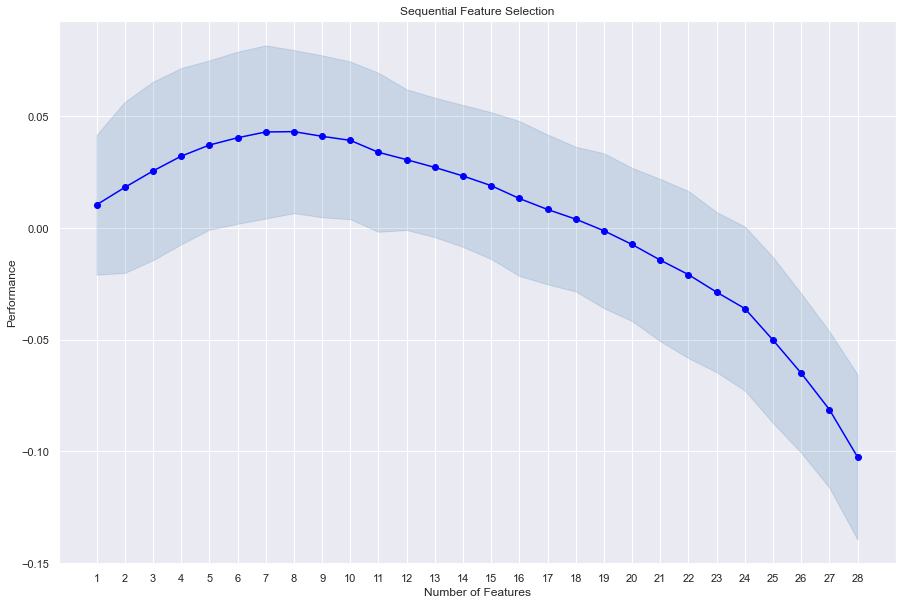

In [14]:
print(sfs.k_score_)

sns.set(rc = {'figure.figsize':(10,5)})

fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

plt.savefig("Optimizacion_Y2.jpg")

In [15]:
X = datos[list(sfs.k_feature_names_)]

In [16]:
x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

In [17]:
#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.0937
mse:  1.1247


In [18]:
#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [19]:
#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.3365 3.6475  3.8502 4.0658 5.0416


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.397516    0.412930   5.8061  0.000000
Amigos_Moto           -0.189301    0.155287  -1.2190  0.223934
Edad                   0.011781    0.002402   4.9045  0.000002
Ocupación_Hogar       -1.083781    0.537751  -2.0154  0.044892
Licencia_moto_otros   -0.091768    0.086715  -1.0583  0.290915
Cantidad_Motos         0.290780    0.136547   2.1295  0.034151
Ingreso_norm_personas  0.159537    0.090724   1.7585  0.079841
Accidente              0.208636    0.121070   1.7233  0.086028
Nivel_Educacion        0.199663    0.061518   3.2456  0.001326
---
R-squared:  0.09373,    Adjusted R-squared:  0.06496
F-statistic: 3.26 on 8 features


In [20]:
# Retirando aquellos por encima de 0.1

X.pop("Amigos_Moto")
X.pop("Licencia_moto_otros")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0848
mse:  1.1358
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.4639 3.6666   3.848 4.0354 4.8085


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.286695    0.407236   5.6152  0.000000
Edad                   0.010215    0.002361   4.3256  0.000022
Ocupación_Hogar       -1.092891    0.540107  -2.0235  0.044047
Cantidad_Motos         0.233930    0.127849   1.8297  0.068434
Ingreso_norm_personas  0.161931    0.091099   1.7775  0.076649
Accidente              0.191689    0.121020   1.5839  0.114421
Nivel_Educacion        0.196881    0.061528   3.1999  0.001545
---
R-squared:  0.08480,    Adjusted R-squared:  0.06318
F-statistic: 3.92 on 6 features


r2  0.0763
mse:  1.1464
=====================================Summary=====================================
Residuals:
  Min     1Q  Median     3Q    Max
2.612 3.6532  3.8528 4.0409 4.6641


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.393958    0.403163   5.9379  0.000000
Edad                   0.009281    0.002369   3.9183  0.000114
Ocupación_Hogar       -1.023772    0.540798  -1.8931  0.059458
Cantidad_Motos         0.261131    0.126663   2.0616  0.040238
Ingreso_norm_personas  0.156407    0.091478   1.7098  0.088500
Nivel_Educacion        0.191065    0.061771   3.0931  0.002197
---
R-squared:  0.07631,    Adjusted R-squared:  0.05820
F-statistic: 4.21 on 5 features


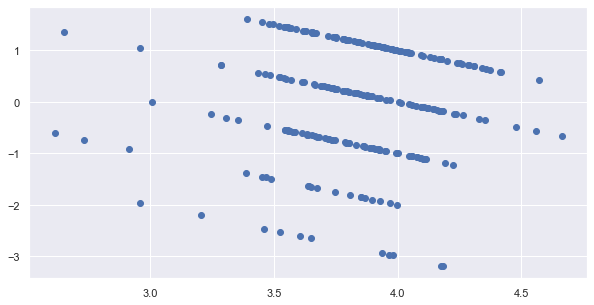

In [21]:
# Retirando aquellos por encima de 0.1

X.pop('Accidente')

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

sns.set(rc = {'figure.figsize':(10,5)})
residuals = np.subtract(y_train, y_pred)
plt.scatter(y_pred, residuals)

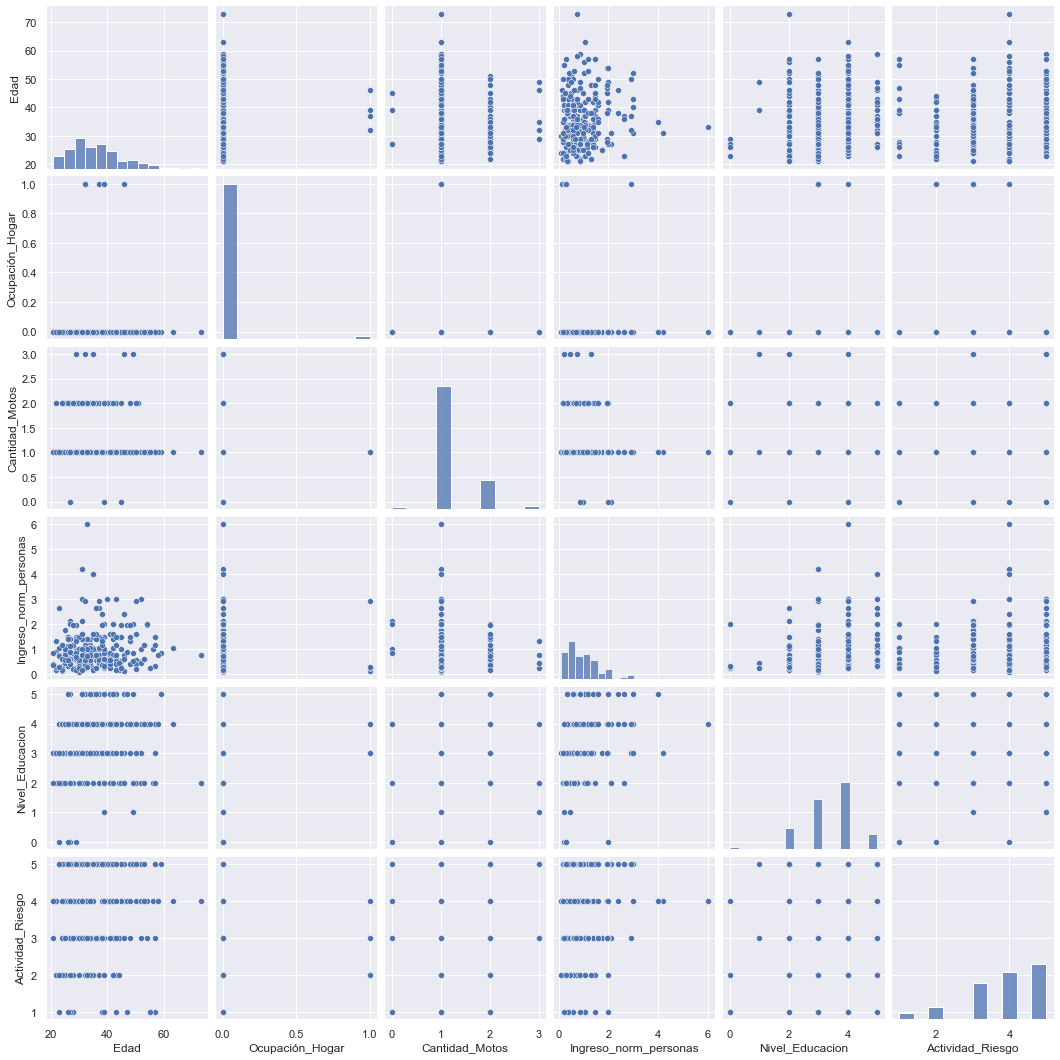

In [22]:
Res=datos[['Edad', 'Ocupación_Hogar', 'Cantidad_Motos', 'Ingreso_norm_personas', 'Nivel_Educacion','Actividad_Riesgo']]
sns.pairplot(Res,height=2.5)

# Backward - Ingreso + Edad

In [23]:
datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Ingreso_norm_personas")
datos.pop("Hombre_18_40")
datos.pop("Edad_18_40")
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")
datos.head()

,Actividad_Riesgo,Propietario_Moto,Amigos_Moto,Familiares_Moto,Licencia_Carro,Genero,Edad,Posición_Jefe(a)_hogar,Posición_Hijo(a),Ocupación_Independiente,...,Días_Uso_Moto,Viaja_Solo,Destino_Fijo,Hora_Pico,Viajes_Fuera,Ingreso,Periferia,Accidente,Nivel_Educacion,Cilindraje
0,3,1,1,1,0,0,24,0,1,0,...,5,1,1,0,1,1.750,1,1,2,0
1,4,1,1,1,1,0,29,0,1,1,...,6,1,0,0,0,3.000,1,0,4,0
2,5,1,1,1,0,0,49,0,1,1,...,3,0,1,0,1,2.250,1,0,1,0
3,5,0,0,0,1,1,25,0,1,1,...,2,0,1,0,1,7.900,0,0,3,0
4,5,1,1,1,0,1,38,1,0,0,...,6,1,1,0,1,1.164,1,0,2,0


In [24]:
X = datos_trabajo.iloc[:,1:29]

x_train = X
y_train = Y.values

In [25]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=6, forward=False,cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

('Edad', 'Ocupación_Hogar', 'Licencia_moto_otros', 'Cantidad_Motos', 'Accidente', 'Nivel_Educacion')
6
0.040392297760479826


Text(0.5, 1.0, 'Sequential Feature Selection')

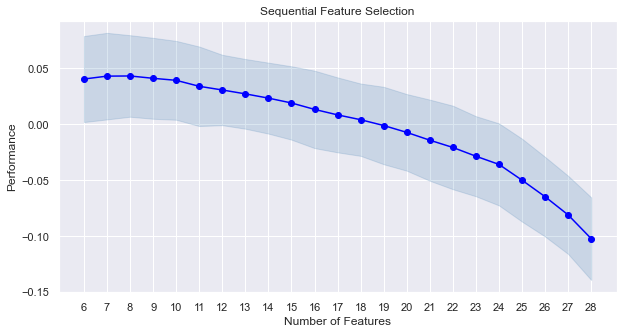

In [26]:
fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

In [27]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0784
mse:  1.1437
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.4786 3.6721  3.8541 4.0449 4.4995


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           2.346441    0.408506   5.7440  0.000000
Edad                 0.011575    0.002383   4.8575  0.000002
Ocupación_Hogar     -1.086687    0.542192  -2.0042  0.046081
Licencia_moto_otros -0.100847    0.087317  -1.1549  0.249173
Cantidad_Motos       0.266288    0.137057   1.9429  0.053107
Accidente            0.190625    0.121692   1.5665  0.118457
Nivel_Educacion      0.234278    0.058957   3.9737  0.000092
---
R-squared:  0.07843,    Adjusted R-squared:  0.05666
F-statistic: 3.60 on 6 features


r2  0.0663
mse:  1.1588
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.6781 3.6656  3.8759 4.0047 4.4584


Coefficients:
                 Estimate  Std. Error  t value   p value
_intercept       2.431070    0.404760   6.0062  0.000000
Edad             0.009913    0.002363   4.1945  0.000038
Ocupación_Hogar -1.039183    0.543660  -1.9115  0.057045
Cantidad_Motos   0.235672    0.126830   1.8582  0.064275
Nivel_Educacion  0.227930    0.059250   3.8469  0.000151
---
R-squared:  0.06626,    Adjusted R-squared:  0.05167
F-statistic: 4.54 on 4 features


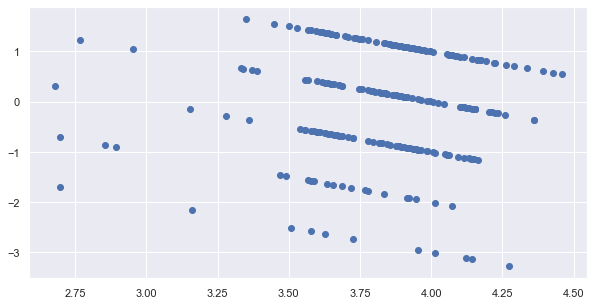

In [28]:
# Retirando aquellos por encima de 0.1

X.pop("Accidente")
X.pop("Licencia_moto_otros")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

sns.set(rc = {'figure.figsize':(10,5)})
residuals = np.subtract(y_train, y_pred)
plt.scatter(y_pred, residuals)

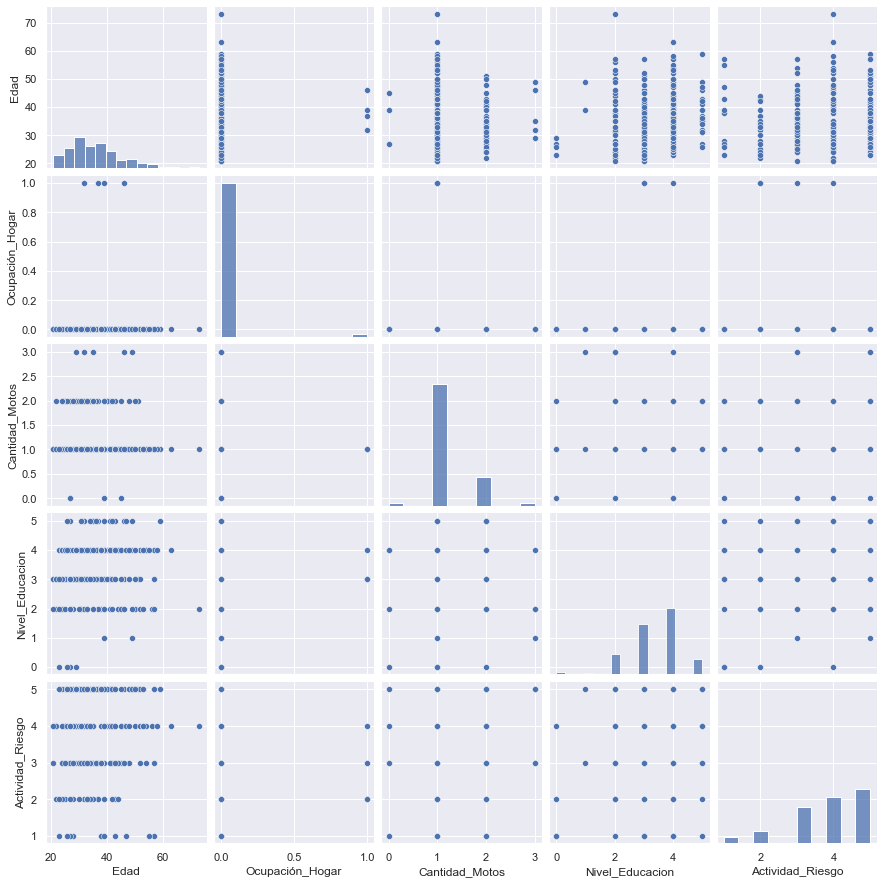

In [29]:
Res=datos[['Edad', 'Ocupación_Hogar', 'Cantidad_Motos', 'Nivel_Educacion','Actividad_Riesgo']]
sns.pairplot(Res,height=2.5)

# Forward - Ingreso norm por personas + Edad

In [30]:
datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Ingreso")
datos.pop("Hombre_18_40")
datos.pop("Edad_18_40")
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")

X = datos.iloc[:,1:29]

x_train = X
y_train = Y.values

model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=(1,28), forward=True, cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

('Amigos_Moto', 'Edad', 'Ocupación_Hogar', 'Licencia_moto_otros', 'Cantidad_Motos', 'Ingreso_norm_personas', 'Accidente', 'Nivel_Educacion')
8
0.0431368651948737


In [31]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0937
mse:  1.1247
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.3365 3.6475  3.8502 4.0658 5.0416


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.397516    0.412930   5.8061  0.000000
Amigos_Moto           -0.189301    0.155287  -1.2190  0.223934
Edad                   0.011781    0.002402   4.9045  0.000002
Ocupación_Hogar       -1.083781    0.537751  -2.0154  0.044892
Licencia_moto_otros   -0.091768    0.086715  -1.0583  0.290915
Cantidad_Motos         0.290780    0.136547   2.1295  0.034151
Ingreso_norm_personas  0.159537    0.090724   1.7585  0.079841
Accidente              0.208636    0.121070   1.7233  0.086028
Nivel_Educacion        0.199663    0.061518   3.2456  0.001326
---
R-squared:  0.09373,    Adjusted R-squared:  0.06496
F-statistic: 3.26 on 8 features


In [32]:
# Retirando aquellos por encima de 0.1

X.pop("Amigos_Moto")
X.pop("Licencia_moto_otros")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0848
mse:  1.1358
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.4639 3.6666   3.848 4.0354 4.8085


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.286695    0.407236   5.6152  0.000000
Edad                   0.010215    0.002361   4.3256  0.000022
Ocupación_Hogar       -1.092891    0.540107  -2.0235  0.044047
Cantidad_Motos         0.233930    0.127849   1.8297  0.068434
Ingreso_norm_personas  0.161931    0.091099   1.7775  0.076649
Accidente              0.191689    0.121020   1.5839  0.114421
Nivel_Educacion        0.196881    0.061528   3.1999  0.001545
---
R-squared:  0.08480,    Adjusted R-squared:  0.06318
F-statistic: 3.92 on 6 features


r2  0.0763
mse:  1.1464
=====================================Summary=====================================
Residuals:
  Min     1Q  Median     3Q    Max
2.612 3.6532  3.8528 4.0409 4.6641


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.393958    0.403163   5.9379  0.000000
Edad                   0.009281    0.002369   3.9183  0.000114
Ocupación_Hogar       -1.023772    0.540798  -1.8931  0.059458
Cantidad_Motos         0.261131    0.126663   2.0616  0.040238
Ingreso_norm_personas  0.156407    0.091478   1.7098  0.088500
Nivel_Educacion        0.191065    0.061771   3.0931  0.002197
---
R-squared:  0.07631,    Adjusted R-squared:  0.05820
F-statistic: 4.21 on 5 features


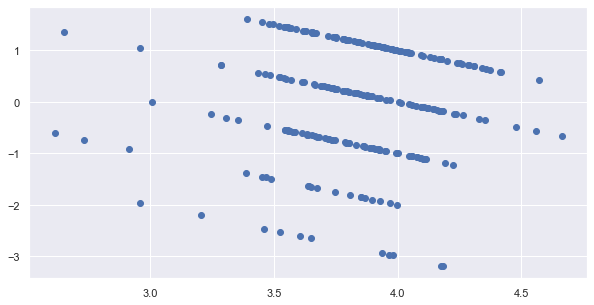

In [33]:
# Retirando aquellos por encima de 0.1

X.pop('Accidente')

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

sns.set(rc = {'figure.figsize':(10,5)})
residuals = np.subtract(y_train, y_pred)
plt.scatter(y_pred, residuals)

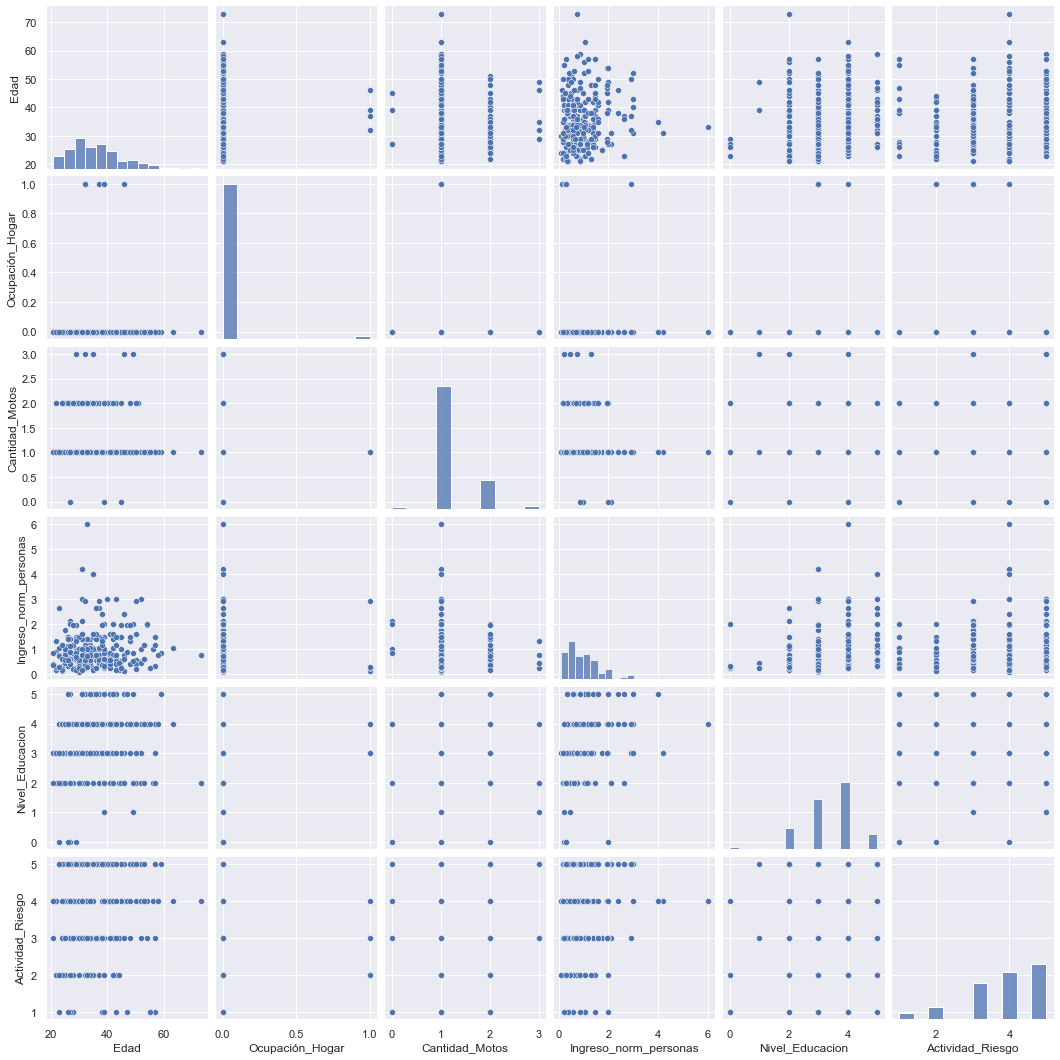

In [34]:
Res=datos[['Edad', 'Ocupación_Hogar', 'Cantidad_Motos', 'Ingreso_norm_personas', 'Nivel_Educacion','Actividad_Riesgo']]
sns.pairplot(Res,height=2.5)
plt.savefig('Pairplot_forward.jpg')

# Backward Ingreso + Edad 18 - 40

In [35]:
datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Ingreso_norm_personas")
datos.pop("Hombre_18_40")
datos.pop("Edad")
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")
datos.head()

,Actividad_Riesgo,Propietario_Moto,Amigos_Moto,Familiares_Moto,Licencia_Carro,Genero,Posición_Jefe(a)_hogar,Posición_Hijo(a),Ocupación_Independiente,Ocupación_Hogar,...,Viaja_Solo,Destino_Fijo,Hora_Pico,Viajes_Fuera,Ingreso,Periferia,Accidente,Nivel_Educacion,Cilindraje,Edad_18_40
0,3,1,1,1,0,0,0,1,0,0,...,1,1,0,1,1.750,1,1,2,0,1
1,4,1,1,1,1,0,0,1,1,0,...,1,0,0,0,3.000,1,0,4,0,1
2,5,1,1,1,0,0,0,1,1,0,...,0,1,0,1,2.250,1,0,1,0,0
3,5,0,0,0,1,1,0,1,1,0,...,0,1,0,1,7.900,0,0,3,0,1
4,5,1,1,1,0,1,1,0,0,0,...,1,1,0,1,1.164,1,0,2,0,1


In [36]:
X = datos.iloc[:,1:29]

x_train = X
y_train = Y.values

('Ocupación_Hogar', 'Licencia_moto_otros', 'Cantidad_Motos', 'Accidente', 'Nivel_Educacion', 'Edad_18_40')
6
0.033545868239214974


Text(0.5, 1.0, 'Sequential Feature Selection')

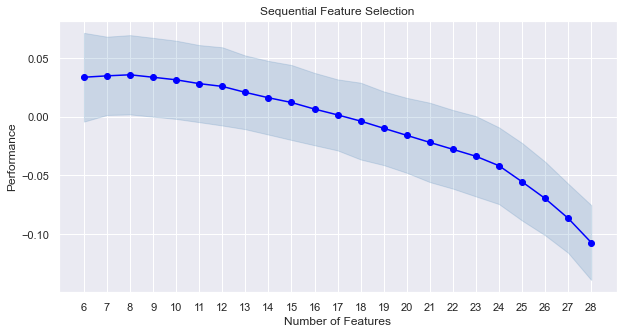

In [37]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=6, forward=False,cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

In [38]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

In [39]:
#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0742
mse:  1.149
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.4485 3.6782  3.8529 4.0179 4.5026


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           2.855320    0.327598   8.7159  0.000000
Ocupación_Hogar     -1.046689    0.542999  -1.9276  0.054993
Licencia_moto_otros -0.091501    0.084811  -1.0789  0.281641
Cantidad_Motos       0.260788    0.134714   1.9359  0.053968
Accidente            0.174710    0.121686   1.4357  0.152276
Nivel_Educacion      0.242357    0.040275   6.0176  0.000000
Edad_18_40          -0.164979    0.143485  -1.1498  0.251282
---
R-squared:  0.07421,    Adjusted R-squared:  0.05234
F-statistic: 3.39 on 6 features


In [40]:
# Retirando aquellos por encima de 0.1

X.pop("Accidente")
X.pop("Licencia_moto_otros")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0639
mse:  1.1617
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.6515 3.6585  3.8938 4.0525 4.5227


Coefficients:
                 Estimate  Std. Error  t value   p value
_intercept       2.876517    0.322054   8.9318  0.000000
Ocupación_Hogar -1.007035    0.543943  -1.8514  0.065251
Cantidad_Motos   0.234872    0.122655   1.9149  0.056603
Nivel_Educacion  0.235284    0.039013   6.0309  0.000000
Edad_18_40      -0.158704    0.144000  -1.1021  0.271432
---
R-squared:  0.06392,    Adjusted R-squared:  0.04929
F-statistic: 4.37 on 4 features


### Edad 18 - 40 no sale representativa

# Backward Ingreso norm personas + Edad 18 - 40

In [41]:
datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Ingreso")
datos.pop("Hombre_18_40")
datos.pop("Edad")
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")
datos.head()

,Actividad_Riesgo,Propietario_Moto,Amigos_Moto,Familiares_Moto,Licencia_Carro,Genero,Posición_Jefe(a)_hogar,Posición_Hijo(a),Ocupación_Independiente,Ocupación_Hogar,...,Viaja_Solo,Destino_Fijo,Hora_Pico,Viajes_Fuera,Periferia,Ingreso_norm_personas,Accidente,Nivel_Educacion,Cilindraje,Edad_18_40
0,3,1,1,1,0,0,0,1,0,0,...,1,1,0,1,1,0.292,1,2,0,1
1,4,1,1,1,1,0,0,1,1,0,...,1,0,0,0,1,1.000,0,4,0,1
2,5,1,1,1,0,0,0,1,1,0,...,0,1,0,1,1,0.450,0,1,0,0
3,5,0,0,0,1,1,0,1,1,0,...,0,1,0,1,0,1.129,0,3,0,1
4,5,1,1,1,0,1,1,0,0,0,...,1,1,0,1,1,0.582,0,2,0,1


In [42]:
X = datos.iloc[:,1:29]

x_train = X
y_train = Y.values

('Ocupación_Hogar', 'Cantidad_Motos', 'Ingreso_norm_personas', 'Accidente', 'Nivel_Educacion', 'Edad_18_40')
6
0.03471863932298965


Text(0.5, 1.0, 'Sequential Feature Selection')

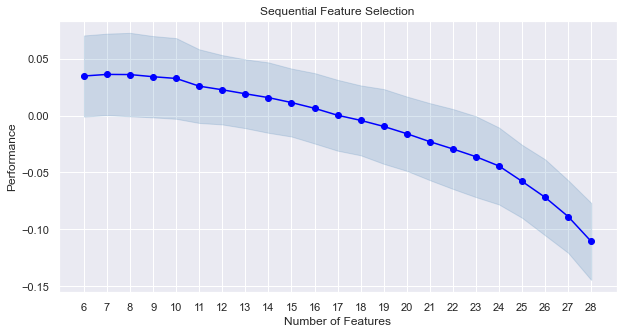

In [43]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=6, forward=False,cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

In [44]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0817
mse:  1.1397
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.4282 3.6839  3.8694 4.0296 4.8041


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.741009    0.325107   8.4311  0.000000
Ocupación_Hogar       -1.055484    0.540492  -1.9528  0.051914
Cantidad_Motos         0.234455    0.123775   1.8942  0.059309
Ingreso_norm_personas  0.164436    0.089819   1.8308  0.068282
Accidente              0.178312    0.120890   1.4750  0.141425
Nivel_Educacion        0.203399    0.043468   4.6793  0.000005
Edad_18_40            -0.149846    0.142809  -1.0493  0.295024
---
R-squared:  0.08167,    Adjusted R-squared:  0.05998
F-statistic: 3.76 on 6 features


In [45]:
# Retirando aquellos por encima de 0.1

X.pop("Accidente")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0743
mse:  1.1489
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.5671 3.6477  3.8466 4.0274 4.6643


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             2.810320    0.322650   8.7101  0.000000
Ocupación_Hogar       -0.993451    0.540972  -1.8364  0.067437
Cantidad_Motos         0.260810    0.122401   2.1308  0.034046
Ingreso_norm_personas  0.158763    0.090137   1.7613  0.079355
Nivel_Educacion        0.197384    0.043437   4.5442  0.000008
Edad_18_40            -0.148942    0.143271  -1.0396  0.299500
---
R-squared:  0.07428,    Adjusted R-squared:  0.05613
F-statistic: 4.09 on 5 features


### Edad 18 - 40 no sale representativa

# Backward Ingreso + Hombre 18 - 40

In [46]:
datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Ingreso_norm_personas")
datos.pop("Edad")
datos.pop("Edad_18_40")
datos.pop("Genero")
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")
datos.head()

,Actividad_Riesgo,Propietario_Moto,Amigos_Moto,Familiares_Moto,Licencia_Carro,Posición_Jefe(a)_hogar,Posición_Hijo(a),Ocupación_Independiente,Ocupación_Hogar,Ocupación_Estudiante,...,Viaja_Solo,Destino_Fijo,Hora_Pico,Viajes_Fuera,Ingreso,Periferia,Accidente,Nivel_Educacion,Cilindraje,Hombre_18_40
0,3,1,1,1,0,0,1,0,0,0,...,1,1,0,1,1.750,1,1,2,0,0
1,4,1,1,1,1,0,1,1,0,0,...,1,0,0,0,3.000,1,0,4,0,0
2,5,1,1,1,0,0,1,1,0,0,...,0,1,0,1,2.250,1,0,1,0,0
3,5,0,0,0,1,0,1,1,0,0,...,0,1,0,1,7.900,0,0,3,0,1
4,5,1,1,1,0,1,0,0,0,0,...,1,1,0,1,1.164,1,0,2,0,1


In [47]:
X = datos.iloc[:,1:29]

x_train = X
y_train = Y.values

('Ocupación_Hogar', 'Licencia_moto_otros', 'Cantidad_Motos', 'Ingreso', 'Accidente', 'Nivel_Educacion')
6
0.032655851157863736


Text(0.5, 1.0, 'Sequential Feature Selection')

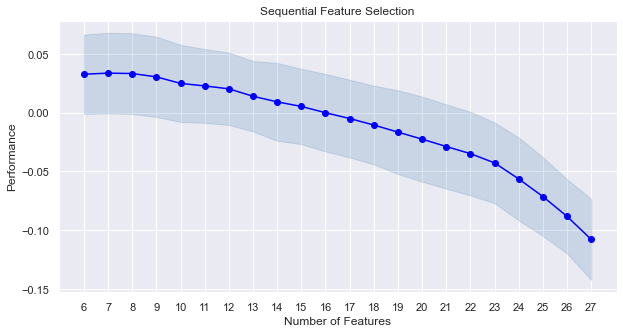

In [48]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=6, forward=False,cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

### Hombre 18 - 40 no sale representativa

In [49]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0787
mse:  1.1434
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.4304 3.6604  3.8602 4.0371 4.5302


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           2.707082    0.314529   8.6068  0.000000
Ocupación_Hogar     -0.978000    0.543746  -1.7986  0.073236
Licencia_moto_otros -0.117012    0.086646  -1.3505  0.178040
Cantidad_Motos       0.274631    0.133509   2.0570  0.040682
Ingreso              0.044473    0.023601   1.8844  0.060633
Accidente            0.191735    0.121783   1.5744  0.116612
Nivel_Educacion      0.202969    0.049250   4.1212  0.000051
---
R-squared:  0.07866,    Adjusted R-squared:  0.05690
F-statistic: 3.61 on 6 features


In [50]:
# Retirando aquellos por encima de 0.1

X.pop("Accidente")
X.pop("Licencia_moto_otros")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0653
mse:  1.16
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.6476 3.6631   3.868 3.9905 4.5276


Coefficients:
                 Estimate  Std. Error  t value   p value
_intercept       2.738361    0.309869   8.8372  0.000000
Ocupación_Hogar -0.955947    0.545494  -1.7524  0.080876
Cantidad_Motos   0.233650    0.121072   1.9298  0.054715
Ingreso          0.034040    0.023348   1.4580  0.146051
Nivel_Educacion  0.204842    0.048790   4.1984  0.000037
---
R-squared:  0.06528,    Adjusted R-squared:  0.05068
F-statistic: 4.47 on 4 features


# Backward Ingreso norm personas + Hombre 18 - 40

In [51]:
datos = pd.read_csv("Variables_Actividad_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Ingreso")
datos.pop("Edad")
datos.pop("Edad_18_40")
datos.pop("Genero")
datos.pop("Unnamed: 33")
datos.pop("Unnamed: 34")
datos.head()

,Actividad_Riesgo,Propietario_Moto,Amigos_Moto,Familiares_Moto,Licencia_Carro,Posición_Jefe(a)_hogar,Posición_Hijo(a),Ocupación_Independiente,Ocupación_Hogar,Ocupación_Estudiante,...,Viaja_Solo,Destino_Fijo,Hora_Pico,Viajes_Fuera,Periferia,Ingreso_norm_personas,Accidente,Nivel_Educacion,Cilindraje,Hombre_18_40
0,3,1,1,1,0,0,1,0,0,0,...,1,1,0,1,1,0.292,1,2,0,0
1,4,1,1,1,1,0,1,1,0,0,...,1,0,0,0,1,1.000,0,4,0,0
2,5,1,1,1,0,0,1,1,0,0,...,0,1,0,1,1,0.450,0,1,0,0
3,5,0,0,0,1,0,1,1,0,0,...,0,1,0,1,0,1.129,0,3,0,1
4,5,1,1,1,0,1,0,0,0,0,...,1,1,0,1,1,0.582,0,2,0,1


('Ocupación_Hogar', 'Licencia_moto_otros', 'Cantidad_Motos', 'Ingreso_norm_personas', 'Accidente', 'Nivel_Educacion')
6
0.03348226210205364


Text(0.5, 1.0, 'Sequential Feature Selection')

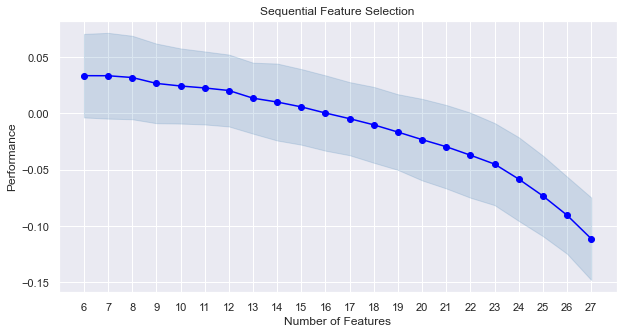

In [52]:
X = datos.iloc[:,1:29]

x_train = X
y_train = Y.values

model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=6, forward=False,cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

### Hombre 18 - 40 no sale representativa